In [164]:
# Imports
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd

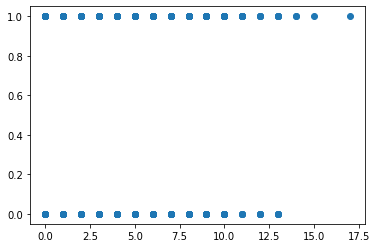

In [81]:
# Read csv and show scatter graph
df = pd.read_excel('diabetes (1).xlsx')

plt.scatter(df['Pregnancies'], df['Outcome'])

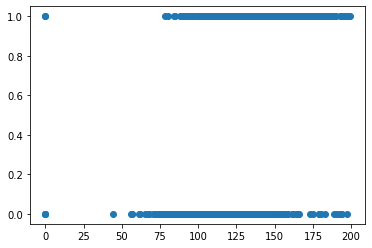

In [82]:
plt.scatter(df['Glucose'], df['Outcome'])

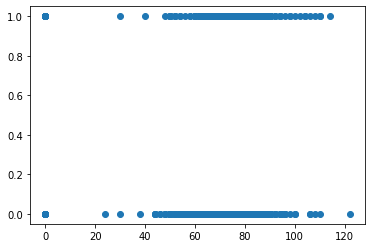

In [83]:
plt.scatter(df['BloodPressure'], df['Outcome'])

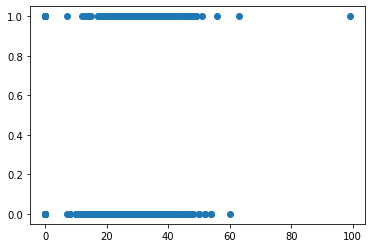

In [84]:
plt.scatter(df['SkinThickness'], df['Outcome'])

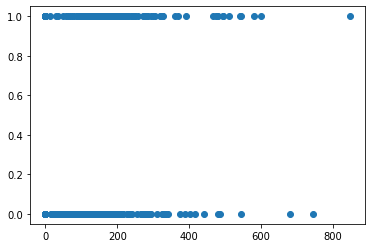

In [85]:
plt.scatter(df['Insulin'], df['Outcome'])

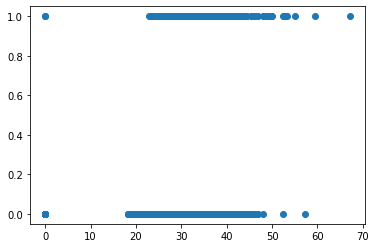

In [86]:
plt.scatter(df['BMI'], df['Outcome'])

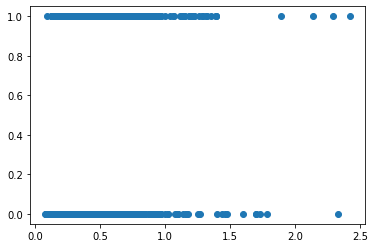

In [87]:
plt.scatter(df['DiabetesPedigreeFunction'], df['Outcome'])

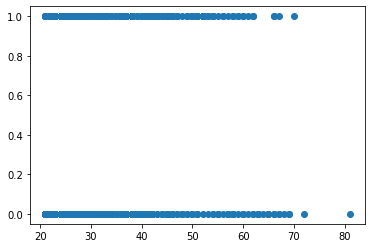

In [88]:
plt.scatter(df['Age'], df['Outcome'])

In [165]:
# Function to get score average
def GetScoreAverage(scores):
  return sum(scores) / len(scores)

In [159]:
x = df[df.columns[0:len(df.columns) - 1]]
y = df[['Outcome']]

# Training with all columns
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, train_size = 0.7)

scores = []
for i in range(0, 3):
  clf = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, max_iter = 2500, hidden_layer_sizes=(12, 8, 10)).fit(x_train, y_train.values.ravel())
  scores.append(clf.score(x_test, y_test))
  
GetScoreAverage(scores)

0.7301587301587302

In [106]:
# Correlation with Outcome
corrMatrix = df.corr()
corrMatrix = corrMatrix.sort_values(['Outcome'], ascending = False)
corrMatrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068


In [103]:
# Attrs with highets correlation with Outcome
x = df[['Glucose', 'BMI', 'Age', 'Pregnancies']]
x

,Glucose,BMI,Age,Pregnancies
0,148,33.6,50,6
1,85,26.6,31,1
2,183,23.3,32,8
3,89,28.1,21,1
4,137,43.1,33,0
...,...,...,...,...
763,101,32.9,63,10
764,122,36.8,27,2
765,121,26.2,30,5
766,126,30.1,47,1


In [160]:
# Training with attrs with highest correlation with Outcome
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, train_size = 0.7)

scores = []
for i in range(0, 3):
  clf = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, max_iter = 3000, hidden_layer_sizes=(12, 8, 10)).fit(x_train, y_train.values.ravel())
  scores.append(clf.score(x_test, y_test))
  
GetScoreAverage(scores)

0.7431457431457432

In [142]:
# Attrs arbitrary chosen related to diabetes
x = df[['Glucose', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction']]
x

,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction
0,148,72,0,0.627
1,85,66,0,0.351
2,183,64,0,0.672
3,89,66,94,0.167
4,137,40,168,2.288
...,...,...,...,...
763,101,76,180,0.171
764,122,70,0,0.340
765,121,72,112,0.245
766,126,60,0,0.349


In [163]:
# Training with attrs arbitrary chosen
scores = []
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, train_size = 0.7)

scores = []
for i in range(0, 3):
  clf = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, max_iter = 2500, hidden_layer_sizes=(12, 8, 10)).fit(x_train, y_train.values.ravel())
  scores.append(clf.score(x_test, y_test))
  
GetScoreAverage(scores)

0.7604617604617605